In [3]:
# singly-linked list data structure
#
class LinkedList:

    # initial values for the properties of an empty LinkedList object
    #
    # they begin with an understore to mark that they should not
    # be accessed directly from outside, only through methods
    #
    def __init__(self):
        self._head = None
        self._tail = None
    
    # inserts an additional item at the head of the list
    #
    def push_front(self, value):
        new_node = LinkedListNode()
        new_node.set_item(value)
        if self.is_empty():
            self._tail = new_node  # if the list is empty, the new node also becomes its tail
        new_node.set_next(self._head)  # the old head is attached to the new element
        self._head = new_node  # the new node now becomes the new head of the list
    
    # insert an item right after a given node;
    # precondition/contract: the node must belong to the present list
    #
    def push_after(self, node, value):
        new_node = LinkedListNode()
        if not node.has_next():  # check whether we are inserting at the end of the list
            self._tail = new_node   # if that is the case, the new node becomes the tail of the list
        new_node.set_item(value)
        new_node.set_next(node.get_next())
        node.set_next(new_node)
    
    # inserts an additional item at the end of the list
    #
    def push_back(self, value):
        if not self.is_empty():
            self.push_after(self._tail, value)
        else:
            self.push_front(value)
    
    # removes the head element from the list, returning its value
    #
    def pop_front(self):
        old_head_value = self._head.get_item()  # access value of the old head element
        new_head_node = self._head.get_next()
        self._head.set_next(None)  # detach the head from the list (not strictly required)
        self._head = new_head_node  # designate its previous successor as the new head node
        return old_head_value
    
    # removes the successor element of a given node from the list, returning its value;
    # precondition/contract: the node must belong to the present list
    #
    def pop_after(self, node):
        if node.has_next():
            old_successor_node = node.get_next()
            if old_successor_node.has_next():
                new_successor_node = old_successor_node.get_next()
                old_successor_node.set_next(None)  # detach the previous successor from the list
                node.set_next(new_successor_node)
            else:
                node.set_next(None)
                self._tail = node  # node becomes the tail element after the previous tail was detached
            return old_successor_node.get_item()
        else:
            return None
    
    # deleting the content would be feasible just by setting head and tail to None
    # for better consistency, we also detach all the nodes, which is not strictly necessary
    #
    def clear(self):
        while not self.is_empty():
            self.pop_front()

    # states whether the list is empty
    #
    def is_empty(self):
        return (self._head is None)
    
    # returns the first node of the list
    #
    def get_head(self):
        return self._head

    # return the number of elements in the linked list
    #
    def length(self):
        if self.is_empty():
            return 0
        iterator = self._head
        nodes = 1
        while iterator.has_next():
            iterator = iterator.get_next()
            nodes += 1
        return nodes

    # returns a string representation of the list, for printing output
    #
    def string(self):
        out = "<"
        if not self.is_empty():
            iterator = self._head
            while iterator.has_next():
                out = out + str(iterator.get_item()) + "; "
                iterator = iterator.get_next()
            out = out + str(iterator.get_item())
        out = out + ">"
        return out
    
    # replaces the content of self with the content of a dyn. array (Python list)
    #
    def copy_from_dynarray(self, dynarray):
        self.clear()  # remove all previous content from the linked list
        for el in dynarray:
            self.push_back(el)  # insert content of the Python list as new content of self

    # replaces the contant of a dyn. array (Python list) with the content of self
    #
    def copy_into_dynarray(self, dynarray):
        dynarray.clear()
        iterator = self._head
        data_left = True
        while data_left:
            dynarray.append(iterator.get_item())
            if iterator.has_next():
                iterator = iterator.get_next()
            else:
                data_left = False

# node in a singly-linked list
#
class LinkedListNode:
    def __init__(self):
        self._item = None
        self._next = None
    
    def set_item(self, value):
        self._item = value
    def set_next(self, next_node):
        self._next = next_node
    
    def get_item(self):
        return self._item
    def get_next(self):
        return self._next
    
    # returns True if there is a next element, false if the next
    # element is None, i.e., if we are at the end of the list
    #
    def has_next(self):
        return (self._next is not None)

In [4]:
import random

random_dynarray = [random.randrange(25) for i in range(5)]
print("random_dynarray:", random_dynarray)

linked_list_copy = LinkedList()
linked_list_copy.copy_from_dynarray(random_dynarray)
print("linked_list_copy:", linked_list_copy.string())
print("length of linked list:", linked_list_copy.length())

random_dynarray: [24, 8, 12, 8, 9]
linked_list_copy: <24; 8; 12; 8; 9>
length of linked list: 5


In [5]:
# Problem/task:
#
# For each element (el) of a list, determine its value modulo three (el % 3),
# and replace it with el % 3 copies of itself, adjacent to each other
#
# Precondition: The argument is a list (Python list or linked list, respectively) of integer numbers
#
# In other words, multiples of three are deleted, values of the type 3k+1 are unchanged,
# and values of the type 3k+2 are copied so that they occur twice, next to each other
#
# For example, [4, 11, 8, 9, 20] should become [4, 11, 11, 8, 8, 20, 20]

# Implementation for a Python list (dynamic array)
#
def mod3_copying_dynarray(dynarray):
    # note that the length of the list changes during this operation;
    # we need the index no. for inserting elements in the middle;
    # therefore a loop over range(...) will be inappropriate
    #
    i = 0
    while i < len(dynarray):
        if dynarray[i] % 3 == 0:
            dynarray.pop(i)  # multiple of 3, remove from list
        elif dynarray[i] % 3 == 2:
            dynarray.insert(i+1, dynarray[i])  # insert a copy of the present value
            i += 2  # jump two forward, to the next value
        else:
            i += 1  # do nothing, proceed to the next value

def mod3_copying_linked_list(linked_list):
    if linked_list.is_empty():
        return
    #
    # special treatment for the head element
    #
    # why is that necessary? the singly linked list distinguishes
    # "pop_after" and "push_after" from "pop_front" and "push_front"
    #
    iterator = linked_list.get_head()
    while iterator.get_item() % 3 == 0:
        linked_list.pop_front()
        iterator = linked_list.get_head()
    if iterator.get_item() % 3 == 2:
        linked_list.push_front(iterator.get_item())
    #
    # now traverse the remainder of the list
    #
    while iterator.has_next():
        previous_node = iterator  # for "pop_after", to detach the present element, we need the previous node
        iterator = iterator.get_next()
        if iterator.get_item() % 3 == 0:
            linked_list.pop_after(previous_node)
            iterator = previous_node
        elif iterator.get_item() % 3 == 2:
            linked_list.push_after(iterator, iterator.get_item())
            iterator = iterator.get_next()

In [11]:
import random

random_dynarray = [random.randrange(25) for i in range(5)]
print("random_dynarray:", random_dynarray)

linked_list_copy = LinkedList()
linked_list_copy.copy_from_dynarray(random_dynarray)
print("linked_list_copy:", linked_list_copy.string())

print("\n*** now running the mod-3 copy functions ***\n")

mod3_copying_dynarray(random_dynarray)
mod3_copying_linked_list(linked_list_copy)
print("new status of dyn. array:", random_dynarray)
print("new status of linked list:", linked_list_copy.string())

random_dynarray: [16, 16, 22, 24, 12]
linked_list_copy: <16; 16; 22; 24; 12>

*** now running the mod-3 copy functions ***

new status of dyn. array: [16, 16, 22]
new status of linked list: <16; 16; 22>


In [92]:
import time
import random

step = 50
nmax = 20000
repetitions = 20

perf_dynarray, perf_linked = {}, {}
random.seed()

for n in range(0, nmax+1, step):
    runtime_dynarray, runtime_linked = 0.0, 0.0
    list_lengths_dynarray, list_lengths_linked = 0, 0
    for i in range(repetitions):
        test_dynarray_n = [random.randrange(n*n) for j in range(n)]
        test_linked_n = LinkedList()
        test_linked_n.copy_from_dynarray(test_dynarray_n)
        
        start = time.time()
        mod3_copying_dynarray(test_dynarray_n)
        runtime_dynarray += time.time() - start
        list_lengths_dynarray += len(test_dynarray_n)
        
        start = time.time()
        mod3_copying_linked_list(test_linked_n)
        runtime_linked += time.time() - start
        list_lengths_linked += test_linked_n.length()
        
    perf_dynarray[n] = runtime_dynarray / repetitions
    perf_linked[n] = runtime_linked / repetitions
    
    print(n, perf_dynarray[n], perf_linked[n], \
          list_lengths_dynarray/repetitions, list_lengths_linked/repetitions, sep='\t')

0	8.463859558105468e-07	6.67572021484375e-07	0.0	0.0
50	1.245737075805664e-05	6.177425384521485e-05	50.3	50.3
100	2.0325183868408203e-05	0.00010002851486206055	96.65	96.65
150	3.763437271118164e-05	0.0002047419548034668	150.95	150.95
200	7.393360137939454e-05	0.0003777742385864258	198.3	198.3
250	5.340576171875e-05	0.00024890899658203125	249.0	249.0
300	9.753704071044922e-05	0.0004511833190917969	301.4	301.4
350	9.307861328125e-05	0.0004212379455566406	351.55	351.55
400	9.397268295288085e-05	0.00042210817337036134	403.95	403.95
450	0.00010510683059692383	0.000457310676574707	448.8	448.8
500	0.00012682676315307618	0.0005144119262695312	497.75	497.75
550	0.00013239383697509765	0.0005172252655029297	552.6	552.6
600	0.00015431642532348633	0.0006274223327636719	598.65	598.65
650	0.00018724203109741211	0.000739753246307373	648.9	648.9
700	0.0001826047897338867	0.0006865620613098145	695.0	695.0
750	0.00019485950469970702	0.0007369041442871094	749.05	749.05
800	0.00021898746490478516	0.0007843

6550	0.005497109889984131	0.006597065925598144	6551.3	6551.3
6600	0.00615994930267334	0.00761631727218628	6588.7	6588.7
6650	0.006261670589447021	0.007762479782104492	6658.45	6658.45
6700	0.0058231353759765625	0.00687333345413208	6689.4	6689.4
6750	0.0057525157928466795	0.006850063800811768	6765.4	6765.4
6800	0.005866909027099609	0.006905007362365723	6796.7	6796.7
6850	0.0061998128890991214	0.007177233695983887	6856.15	6856.15
6900	0.0061198115348815914	0.0072493314743041996	6907.25	6907.25
6950	0.0061930656433105465	0.0071612119674682615	6943.5	6943.5
7000	0.006371510028839111	0.0071629762649536135	6965.2	6965.2
7050	0.006458461284637451	0.007604002952575684	7064.5	7064.5
7100	0.007606875896453857	0.00862267017364502	7117.5	7117.5
7150	0.007065916061401367	0.0076346158981323246	7155.25	7155.25
7200	0.006849420070648193	0.007893705368041992	7203.95	7203.95
7250	0.006850004196166992	0.007713115215301514	7263.1	7263.1
7300	0.0069659829139709474	0.00782696008682251	7301.7	7301.7
7350	0.00

13100	0.02130434513092041	0.01461416482925415	13137.5	13137.5
13150	0.021392130851745607	0.014457762241363525	13162.9	13162.9
13200	0.020850944519042968	0.014273452758789062	13236.4	13236.4
13250	0.021086359024047853	0.014301824569702148	13256.0	13256.0
13300	0.021351420879364015	0.014634358882904052	13287.0	13287.0
13350	0.021691834926605223	0.0148323655128479	13352.65	13352.65
13400	0.02172638177871704	0.014599847793579101	13410.15	13410.15
13450	0.02242802381515503	0.015128087997436524	13489.25	13489.25
13500	0.02184985876083374	0.014539766311645507	13519.1	13519.1
13550	0.02183678150177002	0.014546418190002441	13539.55	13539.55
13600	0.021686017513275146	0.014086544513702393	13589.55	13589.55
13650	0.021706581115722656	0.01464238166809082	13590.1	13590.1
13700	0.022080707550048827	0.017379772663116456	13705.5	13705.5
13750	0.02212812900543213	0.014271986484527589	13760.6	13760.6
13800	0.02311791181564331	0.014808082580566406	13810.15	13810.15
13850	0.022650766372680663	0.0146841287

19550	0.04442429542541504	0.021109282970428467	19571.4	19571.4
19600	0.04492255449295044	0.021379566192626952	19585.2	19585.2
19650	0.04303377866744995	0.020332324504852294	19606.85	19606.85
19700	0.04457027912139892	0.020804929733276366	19695.8	19695.8
19750	0.04626067876815796	0.021799421310424803	19748.7	19748.7
19800	0.046350288391113284	0.022008538246154785	19814.25	19814.25
19850	0.04898281097412109	0.023620855808258057	19824.25	19824.25
19900	0.05220431089401245	0.02534773349761963	19874.6	19874.6
19950	0.05052783489227295	0.027226483821868895	19953.3	19953.3
20000	0.04882289171218872	0.023225855827331544	19964.05	19964.05


<AxesSubplot:xlabel='input list size', ylabel='average runtime in seconds'>

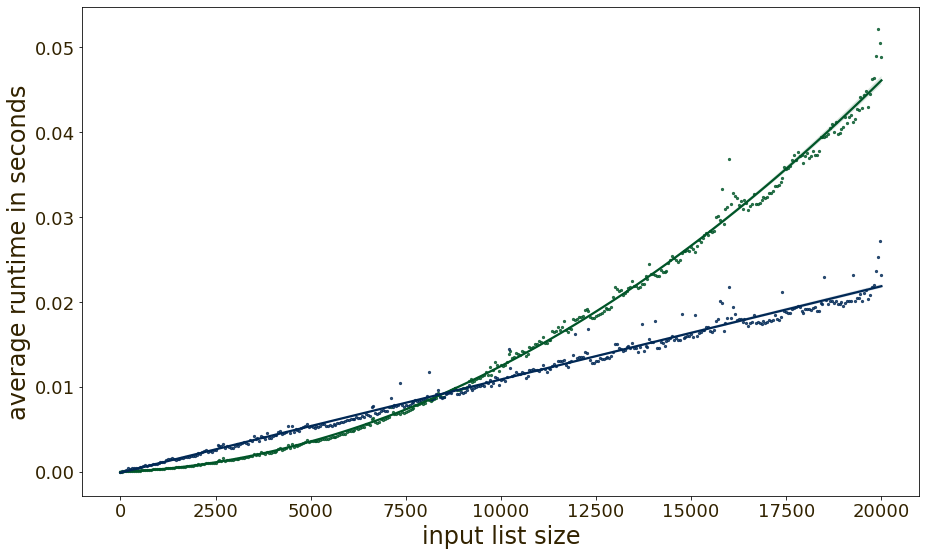

In [93]:
import seaborn as sbn
import matplotlib.pyplot as plt

keylist_dynarray = list(perf_dynarray.keys())
vallist_dynarray = list(perf_dynarray.values())

keylist_linked = list(perf_linked.keys())
vallist_linked = list(perf_linked.values())

fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("input list size", fontsize=24, color="#322300")
ax.set_ylabel("average runtime in seconds", fontsize=24, color="#322300")

sbn.regplot(x=keylist_dynarray, y=vallist_dynarray, color='#005528', \
            order=2, scatter_kws={'s':5})  # green for dynamic array (Python list)
sbn.regplot(x=keylist_linked, y=vallist_linked, color='#002855', \
            order=1, scatter_kws={'s':5})  # blue for singly-linked list